#### Concept and development: Ryan Worm<br>

##### This document is a Jupyter Notebook (.ipynb) file containing both plain-text

In [1]:
print(f'and code (HTML and Python),') 

and code (HTML and Python),


downloaded to pdf via *LaTeX*. This project is ongoing and projections evolve as further data is gathered.<br>

# Introduction

The events of the last year have highlighted large data gaps in fields of healthcare and behavioural sciences. This paper proposes a mental distress index to objectively track social stress over time, and correlate it with various economic indicators to help forecast short and intermediate behavioural responses to stressors.<br>

By using tested infodemiological principles this paper proposes models to estimate levels of percieved stress by the general population in three general areas: sleep, employment, and anxiety. Although those attributes have some interrelation alone, significant $R^{2}$ values to multiple economic indicators strengthen the proposed Mental Distress Index (MDI).<br>

Recent models based on Google Trends data have proven to be more accurate in predicting deaths by suicide then traditional models (Parker et al., 2017; Lee, J., 2020). Building upon these results I wanted to create a more dynamic model that represented both acute and chronic stress adaptations (Sapolsky, 2004). Lee (2020) identified accounting for search lag more accurately predicted deaths by suicide, further supporting the importance of distinguising between acute and chronic stress manifestations.  

The 2019 year was used as a baseline for all Google Trends data as this was the time period of the *Mental health characteristics and suicidal thoughts (Stats Canada, 2019)* dataset on which this paper derives its baseline data. Using 2019 as a baseline we can also estimate current trends against pre-pandemic data for better contrast. This may help provide greater insight on evolving health and social trends, forecasting future behaviours. 

Mental distress will be used as a broad term encompassing any possible mental health condition commonly associated with stress, most commonly a combination of major depression and generalized anxiety disorder (Sapolsky, 2004). Mental health disorders are not simple, singular disease but complex heterogenous conditions.<br> 

This paper propses modeling methodology to estimate mental distress, as identified by *Statistics Canada: Mental health characteristics and suicidal thoughts (2019).* The number of individuals consulting with a health professional or experiencing suicidal thoughts will represent the number of individuals in mental distress in one year. The monthly mean of individuals experiencing MD is then multiplied by the monthly aggregate coefficient to calculate the monthly estimation of individuals suffering MD that month. 

##### Key Findings

There were multiple economic indicators which showed significant correlation to the proposed models. Distinct patterns of acute and chronic stress may inferred from the time adjusted and non-adjusted mental distress index and  represent economical manifestations of physiological acute and chronic stress. The correlation to chronic stress on alcohol ($R^{2}$ = .22), healthcare ($R^{2}$ = .05) are greater then that of acute stress ($R^{2}$ = .10 and .04 accordingly). Acute stress was more strongly related to cannabis ($R^{2}$ = .32) and tobacco sales ($R^{2}$ = .15). It should be noted that tobacco had no relation to chronic stress ($R^{2}$ = 0) while cannabis still maintained a moderate correlation ($R^{2}$ = .22) with chronic stress.

# Methodology

## Google Trends

Google Trends debuted in 2015 and provides two optional time periods:

- Real-time data over the last seven days
- Non-realtime data going back to 2004 up to 36 hours from query time. 

Recent studies have identified keyword correlation between increased monthly Google search volume (MGSV) and death by suicide, alcohol and drugs (Parker et al., 2017; Lee, J., 2020). Of eighty-nine related search words, Lee (2020) identified four key words that he identified as having the highest correlation to increases in death by suicide:<br>

- "Generalzied Anxiety Disorder" (GAD)<br>
- "Anxiety Disorder"<br>
- "Insomnia"<br>
- "Laid off"

For the purposes of this study only Google Trends non-realtime datasets will be used. This allows for year over year  comparisons from which we can gather insight. 

As *General Anxiety Disorder* and *Anxiety Disorder* were very similar, Generalized Anxiety Disorder (disorder) was used alone to allow for balanced weighing between the stressor keywords. This allows the mental distress models to encompass a broader scope of stressors. The keywords for modeling coefficients were:<br>

- GAD (disorder)<br>
- Insomnia (disorder)<br>
- Laid Off (keyword)

Lee, J. (2020) noted a search lag between increased MGSV keyword searches and deaths related to suicide. To explore this difference two Google Trends algorithms will be used; one with a search lag applied and one without.<br>

This functionally creates two different models: one using preceding months and another the data of the corresponding month. These delayed and acute models may represent an economical manifestation of the acute and delayed stress response as discussed by Sapolsky (2004). 

- GAD; 3 month lag<br>
- Laid off; 2 month lag<br>
- Insomnia; 1 month lag<br>

Correlations between Mental Distress Index and Alcohol, Tobacco, Cannabis, Healthcare, and general GDP (excl. Cannabis) will also be evaluated to identify relationships between the impact of social stress and purchasing habits as represented by industry specific GDP or revenue. 

It should be noted that Google calculates a relative interest score rather then counting absolute search totals. This is to maintain validity over time as the user base expands.  Google Trends data as proven to be a valuable tool in the field of infodemiology, with over 88% of the search engine market as of October 2020. [(Statista, 2020)]("https://www.statista.com/statistics/216573/worldwide-market-share-of-search-engines/#:~:text=Google%20has%20dominated%20the%20search,share%20as%20of%20July%202020") 

## Data Processing

### Data sources

- Google Trends
- Mental health characteristics and suicidal thoughts [(Stats Canada, 2019)](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310009801)*<br>
- Gross domestic product by industry, Sept 2020 [(Stats Canada, 2020)](https://www150.statcan.gc.ca/n1/daily-quotidien/201201/dq201201b-eng.htm)<br>
- Tobacco, sales and inventories, monthly production (x1000) [(Stats Canada, 2020)](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1610004401)<br>
- Monthly retail sales of beer, wine and liquor stores in Canada from 2015 to 2020 (in billion Canadian dollars) [(Statista, 2020)](https://www.statista.com/statistics/461798/monthly-retail-sales-of-beer-wine-and-liquor-stores-canada/)<br>

 *Baseline data for establishing the proposed mental distress index was established by adding 'Consultation with a health professional about emotional or mental health' and 'Suicidal thoughts (15 years and over)' together.

### Preprocessing

- Calculating monthly mean Google Trends relative interest score of each relevant term from Oct 2017 - Jan 2021
- Adjusted and non-adjusted aggregate Google Trends relative interest calculated
- Baseline coefficients for 2019 established
- Baseline coefficients for 2018 and 2020 calculated
- Multiplied relative Time-adjusted and Non-adjusted coefficients by monthly baselines to calculate monthly estimate
- Tobacco sales, Industry (excl. Cannabis), Cannabis, Healthcare, Alcohol sales

![database](database.png)

### Processing

#####  Importing dependancies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from numpy import nan
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import scipy

#### Training models

##### Reading in cleaned dataset

In [3]:
db = pd.read_excel("google_trends_db.xlsx")

#### Calculating mental distress indexes 

##### Setting date ranges

In [4]:
startdate_18 = '2018-01-01'
startdate_19 = '2019-01-01'
startdate_20 = '2020-01-01'
startdate_21 = '2021-01-01'
enddate_18 = '2018-12-31'
enddate_19 = '2019-12-31'
enddate_20 = '2020-12-31'
enddate_21 = '2021-12-31'

##### 2018 MDI Estimations and script

In [5]:
mask_2018 = (db['Date'] >= startdate_18) & (db['Date'] <= enddate_18)
db_2018 = db.loc[mask_2018]
non_distress_2018 = db_2018['Vulnerabilities (Non-adj)'].sum()
adj_distress_2018 = db_2018['Vulnerabilities (Adj)'].sum()
print(f'The adjusted model predicts there were {f"{round(adj_distress_2018,1):,}"} Canadians who dealt with a mental health episode in 2018.')
print(f'The non-adjusted model predicts there were {f"{round(non_distress_2018,1):,}"} Canadians who dealt with a mental health episode in 2018.')

The adjusted model predicts there were 7,790,068.3 Canadians who dealt with a mental health episode in 2018.
The non-adjusted model predicts there were 8,066,567.2 Canadians who dealt with a mental health episode in 2018.


##### 2019 Baseline confirmation

In [6]:
mask_2019 = (db['Date'] >= startdate_19) & (db['Date'] <= enddate_19)
db_2019 = db.loc[mask_2019]
non_distress_2019 = db_2019['Vulnerabilities (Non-adj)'].sum()
adj_distress_2019 = db_2019['Vulnerabilities (Adj)'].sum()
print(f'The adjusted model confirms our baseline of {f"{round(adj_distress_2019,1):,}"} individuals who experienced a mental health episode in 2019.')
print(f'The non-adjusted model confirms our baseline of {f"{round(non_distress_2019,1):,}"} individuals who experienced a mental health episode in 2019.')

The adjusted model confirms our baseline of 8,581,600.0 individuals who experienced a mental health episode in 2019.
The non-adjusted model confirms our baseline of 8,581,600.0 individuals who experienced a mental health episode in 2019.


##### 2020 MDI Estimations and script

In [7]:
mask_2020 = (db['Date'] >= startdate_20) & (db['Date'] <= enddate_20)
db_2020 = db.loc[mask_2020]
non_distress_2020 = db_2020['Vulnerabilities (Non-adj)'].sum()
adj_distress_2020 = db_2020['Vulnerabilities (Adj)'].sum()
print(f'The adjusted model predicts there were {f"{round(adj_distress_2020,1):,}"} individuals who dealt with a mental health episode in 2020.')
print(f'The non-adjusted model predicts there were {f"{round(non_distress_2020,1):,}"} individuals who dealt with a mental health episode in 2020.')

The adjusted model predicts there were 9,789,138.0 individuals who dealt with a mental health episode in 2020.
The non-adjusted model predicts there were 9,821,683.3 individuals who dealt with a mental health episode in 2020.


##### 2021 MDI Estimations and script

In [8]:
mask_2021 = (db['Date'] >= startdate_21) & (db['Date'] <= enddate_21)
db_2021 = db.loc[mask_2021]
non_distress_2021 = db_2021['Vulnerabilities (Non-adj)'].sum()
adj_distress_2021 = db_2021['Vulnerabilities (Adj)'].sum()

##### Isolating Jan 2018-2020 series

In [9]:
jan_2018 = (db['Date'] == startdate_18)
db_jan2018 = db.loc[jan_2018]
jan_2019 = (db['Date'] == startdate_19)
db_jan2019 = db.loc[jan_2019]
jan_2020 = (db['Date'] == startdate_20)
db_jan2020 = db.loc[jan_2020]
jan_2021 = (db['Date'] == startdate_21)
db_jan2021 = db.loc[jan_2021]

##### Calculating naMDI for January 2018-2021 

In [10]:
non_jan18 = db_jan2018['Vulnerabilities (Non-adj)'].sum()
non_jan19 = db_jan2019['Vulnerabilities (Non-adj)'].sum()
non_jan20 = db_jan2020['Vulnerabilities (Non-adj)'].sum()
non_jan21 = db_jan2021['Vulnerabilities (Non-adj)'].sum()

In [11]:
adj_jan18 = db_jan2018['Vulnerabilities (Adj)'].sum()
adj_jan19 = db_jan2019['Vulnerabilities (Adj)'].sum()
adj_jan20 = db_jan2020['Vulnerabilities (Adj)'].sum()
adj_jan21 = db_jan2021['Vulnerabilities (Adj)'].sum()

##### naMDI January 2021 vs January 2019 (Baseline)

In [12]:
non21v19 = non_jan21 / non_jan19
rnd_non21v19 = round((non21v19*100),2)
rnd_non21v19_ = round((non21v19*100) - 100,2)

In [13]:
adj21v19 = adj_jan21 / adj_jan19
rnd_adj21v19 = round((adj21v19*100),2)
rnd_adj21v19_ = round((adj21v19*100) - 100,2)

##### Soft-coding stress forecasting script

In [14]:
print(f'The adjusted model predicts there will be {f"{round(adj_distress_2021,1):,}"} individuals dealing with a mental health episode in January 2021.')
print(f'The non-adjusted model predicts there will be {f"{round(non_distress_2021,1):,}"} individuals dealing with a mental health episode in January 2021.')
print(f'Current naMDI modeling indicate that January 2021 is {rnd_non21v19}% as stressful as January 2019 for the general Canadian population, while taMDI modeling suggests it will be {rnd_adj21v19}% as stressful.')

The adjusted model predicts there will be 844,543.2 individuals dealing with a mental health episode in January 2021.
The non-adjusted model predicts there will be 726,300.3 individuals dealing with a mental health episode in January 2021.
Current naMDI modeling indicate that January 2021 is 97.66% as stressful as January 2019 for the general Canadian population, while taMDI modeling suggests it will be 108.37% as stressful.


##### Calculating year-over-year estimates for taMDI and naMDI modeling

In [15]:
adj_yoy_2020 = adj_distress_2020 - adj_distress_2019
adj_pcnt_2020 = adj_distress_2020/adj_distress_2019
non_yoy_2020 = non_distress_2020 - non_distress_2019
non_pcnt_2020 = non_distress_2020/non_distress_2019

##### Soft-coding prediction script

In [16]:
print(f'Adjusted MDI predicts that 2020 saw an increase of {f"{round(adj_yoy_2020,2):,}"} ({round(adj_pcnt_2020*100,2)}%) Canadians who experienced a serious mental health episode compared to 2019.')
print(f'Non-adjusted MDI predicts that 2020 saw an increase of {f"{round(non_yoy_2020,2):,}"} ({round(non_pcnt_2020*100,2)}%) Canadians who experienced a serious mental health episode compared to 2019.')

Adjusted MDI predicts that 2020 saw an increase of 1,207,537.95 (114.07%) Canadians who experienced a serious mental health episode compared to 2019.
Non-adjusted MDI predicts that 2020 saw an increase of 1,240,083.35 (114.45%) Canadians who experienced a serious mental health episode compared to 2019.


##### Creating labels and arrays for chart

In [17]:
dist_labels = ["2018", "2019", "2020", "Jan 2021 (forecast)"]
non_dist_df = [non_distress_2018, non_distress_2019, non_distress_2020 , non_distress_2021]
adj_dist_df = [adj_distress_2018, adj_distress_2019, adj_distress_2020 , adj_distress_2021]

##### Creating and storing model comparison dataframe 

In [18]:
dist_d = {'Model':["Time-adjusted", "Non-adjusted"],
      '2018':[(f"{round(adj_distress_2018,2):,}"), (f"{round(non_distress_2018,2):,}")],
      '2019':[(f"{round(adj_distress_2019,2):,}"), (f"{round(non_distress_2019,2):,}")],
      '2020':[(f"{round(adj_distress_2020,2):,}"), (f"{round(non_distress_2020,2):,}")],
      '2021':[(f"{round(adj_distress_2021,2):,}"), (f"{round(non_distress_2021,2):,}")]
     }
dist_df = pd.DataFrame(data=dist_d)
dist_df

,Model,2018,2019,2020,2021
0,Time-adjusted,"7,790,068.27","8,581,600.0","9,789,137.95","844,543.21"
1,Non-adjusted,"8,066,567.22","8,581,600.0","9,821,683.35","726,300.28"


##### Plotting grouped bar plot for model comparison

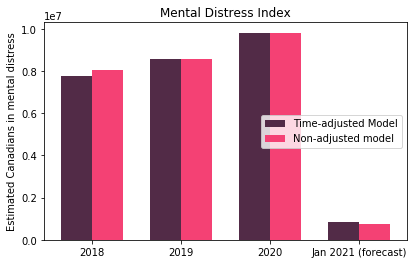

In [19]:
x = np.arange(len(dist_labels))
width = 0.35  
fig, ax = plt.subplots(figsize=(6.5, 4.0))
rect_adj = ax.bar(x - width/2, adj_dist_df, width, color='#522B47', label='Time-adjusted Model')
rect_dist = ax.bar(x + width/2, non_dist_df, width, color='#F44174',  label='Non-adjusted model')
ax.set_ylabel('Estimated Canadians in mental distress')
ax.set_title('Mental Distress Index')
ax.set_xticks(x)
ax.set_xticklabels(dist_labels)
ax.legend(loc='center right')
plt.xticks(rotation=0)
plt.savefig('./dist_chart.png', bbox_inches="tight")

#### taMDI & naMDI plots

##### Storing date and estimations into variables 

In [20]:
date = db["Date"]
vul_adj = db["Vulnerabilities (Adj)"]
vul_non = db["Vulnerabilities (Non-adj)"]

##### Plotting taMDI

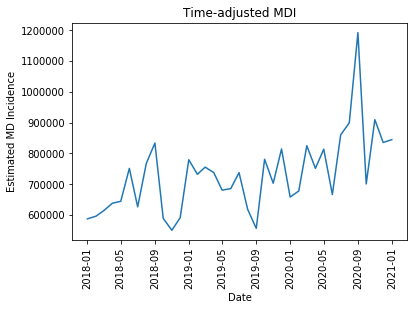

In [21]:
plt.plot(date,  vul_adj)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Estimated MD Incidence")
plt.title('Time-adjusted MDI')
plt.savefig('./aMDI.png', bbox_inches="tight")

##### Plotting naMDI

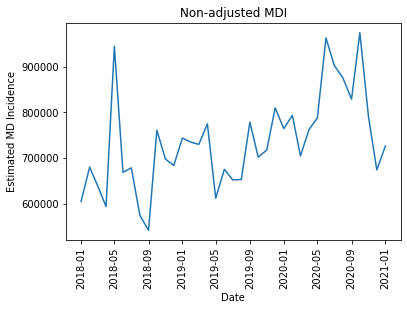

In [22]:
plt.plot(date, vul_non)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Estimated MD Incidence")
plt.title('Non-adjusted MDI')
plt.savefig('./naMDI.png', bbox_inches="tight")

### Economic indicators

#### Alcohol Sales

##### Dropping null values

In [23]:
alcohol_db = db[['Date', 'Alcohol Sales (Billion)']].copy()
alcohol_db2 = alcohol_db.dropna(axis=0)

##### Setting x and y values

In [24]:
alcohol_date = alcohol_db2["Date"]
alcohol = alcohol_db2["Alcohol Sales (Billion)"]

##### Plotting and saving as .png

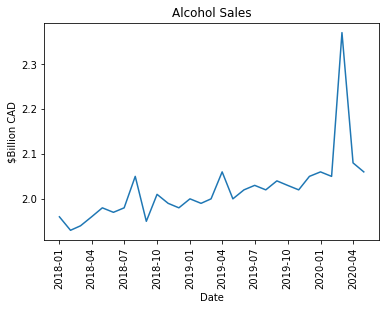

In [25]:
plt.plot(alcohol_date, alcohol)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("$Billion CAD")
plt.title('Alcohol Sales')
plt.savefig('./alcohol.png', bbox_inches="tight")

#### Cigarette Sales 

##### Dropping null values

In [26]:
cig_db = db[['Date', 'Tobacco Sales (x1000)']].copy()
cig_db2 = cig_db.dropna(axis=0)

##### Setting x and y values

In [27]:
cig_date = cig_db2["Date"]
cig = cig_db2["Tobacco Sales (x1000)"]

##### Plotting 

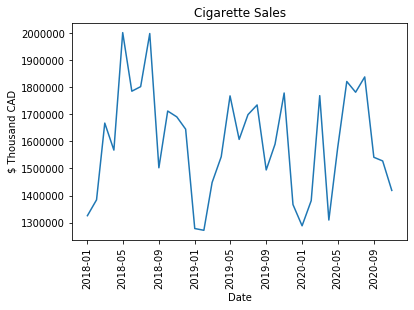

In [28]:
plt.plot(cig_date, cig)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("$ Thousand CAD")
plt.title("Cigarette Sales")
plt.savefig('./cig.png', bbox_inches="tight")

#### Industry (excl. Cannabis)

##### Dropping null values

In [29]:
ind_db = db[['Date', 'All industry (ex. Cannabis)']].copy()
ind_db2 = ind_db.dropna(axis=0)

#### Setting x and y values

In [30]:
ind_date = ind_db2["Date"]
industry = ind_db2["All industry (ex. Cannabis)"]

#### Plotting and saving as .png

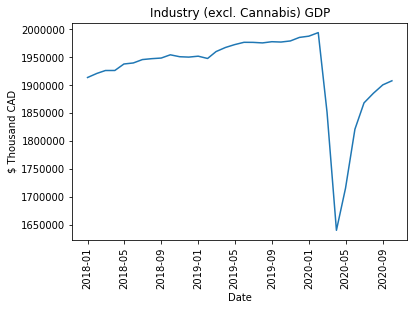

In [31]:
plt.plot(ind_date, industry)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("$ Thousand CAD")
plt.title("Industry (excl. Cannabis) GDP")
plt.savefig('./ind.png', bbox_inches="tight")

#### Cannabis

##### Dropping null values

In [32]:
cannabis_db = db[['Date', 'Cannabis Sector']].copy()
cannabis_db2 = cannabis_db.dropna(axis=0)

##### Setting x and y values

In [33]:
cannabis_date = cannabis_db2["Date"]
cannabis = cannabis_db2["Cannabis Sector"]

##### Plotting and saving as .png

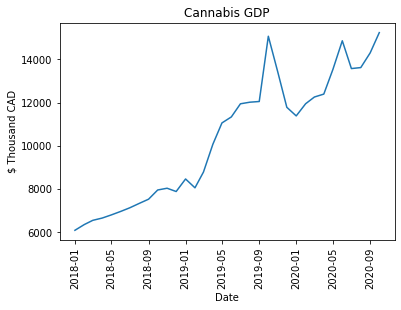

In [34]:
plt.plot(cannabis_date, cannabis)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("$ Thousand CAD")
plt.title("Cannabis GDP")
plt.savefig('./cann.png', bbox_inches="tight")

#### Healthcare and Social Services

##### Dropping the null values

In [35]:
healthcare_db = db[['Date', 'Healthcare & Social Assistance']].copy()
healthcare_db2 = healthcare_db.dropna(axis=0)

##### Setting the x and y values

In [36]:
healthcare_date = healthcare_db2["Date"]
healthcare = healthcare_db2["Healthcare & Social Assistance"]

##### Plotting data

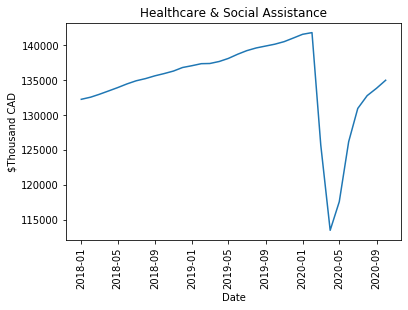

In [37]:
plt.plot(healthcare_date, healthcare)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("$Thousand CAD")
plt.title("Healthcare & Social Assistance")
plt.savefig('./health.png', bbox_inches="tight")

## Calculating coefficients of determination

### Stress and alcohol 

##### Dropping null values

In [38]:
alc_mdi_db = db[['Date', 'Vulnerabilities (Adj)', 'Vulnerabilities (Non-adj)', 'Alcohol Sales (Billion)']]
alc_mdi = alc_mdi_db.dropna(axis=0)

##### Transposing array for linear regression

In [39]:
alcohol = alc_mdi["Alcohol Sales (Billion)"]
vul_adj = alc_mdi["Vulnerabilities (Adj)"]
vul_non = alc_mdi["Vulnerabilities (Non-adj)"]
x_stress_adj = np.array(vul_adj).reshape((-1, 1))
x_stress_non = np.array(vul_non).reshape((-1, 1))

##### Fitting dependant variable (alcohol) to array

In [40]:
y_alcohol = np.array(alcohol)

##### Fitting stress and alcohol to linear regression model

In [41]:
stress_alcohol_model_adj = LinearRegression().fit(x_stress_adj, y_alcohol)
stress_alcohol_model_non = LinearRegression().fit(x_stress_non, y_alcohol)

##### Storing rounded linear $R^{2}$ value for f-string notation

In [42]:
linear_r_adj_alcohol = round(stress_alcohol_model_adj.score(x_stress_adj, y_alcohol),2)
linear_r_non_alcohol = round(stress_alcohol_model_non.score(x_stress_non, y_alcohol),2)

##### Transforming to fit independant variable

In [43]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

transformer_adj = transformer.fit(x_stress_adj)
transformer_non = transformer.fit(x_stress_non)

x_stress_adj_ = transformer_adj.transform(x_stress_adj)
x_stress_non_ = transformer_non.transform(x_stress_non)

##### Fitting polynomial regression model

In [44]:
alcohol_poly_model_adj = LinearRegression().fit(x_stress_adj_, y_alcohol)
alcohol_poly_model_non = LinearRegression().fit(x_stress_non_, y_alcohol)

##### Scoring, rounding and storing $R^{2}$ values for alcohol

In [45]:
poly_r_adj_alcohol = round(alcohol_poly_model_adj.score(x_stress_adj_, y_alcohol),2)
poly_r_non_alcohol = round(alcohol_poly_model_non.score(x_stress_non_, y_alcohol),2)

### Stress and cannabis

##### Dropping null values

In [46]:
cann_mdi_db = db[['Date', 'Vulnerabilities (Adj)', 'Vulnerabilities (Non-adj)', 'Cannabis Sector']]
cann_mdi = cann_mdi_db.dropna(axis=0)

##### Transposing array for linear regression

In [47]:
cannabis = cann_mdi["Cannabis Sector"]
vul_adj = cann_mdi["Vulnerabilities (Adj)"]
vul_non = cann_mdi["Vulnerabilities (Non-adj)"]
x_stress_adj = np.array(vul_adj).reshape((-1, 1))
x_stress_non = np.array(vul_non).reshape((-1, 1))

##### Fitting variable to (cannabis)

In [48]:
y_cannabis = np.array(cannabis)

##### Fitting cannabis to linear regression model

In [49]:
stress_cannabis_model_adj = LinearRegression().fit(x_stress_adj, y_cannabis)
stress_cannabis_model_non = LinearRegression().fit(x_stress_non, y_cannabis)

##### Scoring, rounding and storing linear  $R^{2}$ values for cannabis

In [50]:
linear_r_adj_cann= round(stress_cannabis_model_adj.score(x_stress_adj, y_cannabis),2)
linear_r_non_cann = round(stress_cannabis_model_non.score(x_stress_non, y_cannabis), 2)

##### Transforming to fit independant variables

In [51]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

transformer_adj = transformer.fit(x_stress_adj)
transformer_non = transformer.fit(x_stress_non)

x_stress_adj_ = transformer_adj.transform(x_stress_adj)
x_stress_non_ = transformer_non.transform(x_stress_non)

##### Fitting cannabis to polynomial regression 

In [52]:
cannabis_poly_model_adj = LinearRegression().fit(x_stress_adj_, y_cannabis)
cannabis_poly_model_non = LinearRegression().fit(x_stress_non_, y_cannabis)

##### Scoring, rounding and storing polynomial $R^{2}$ for cannabis

In [53]:
poly_r_adj_cann = round(cannabis_poly_model_adj.score(x_stress_adj_, y_cannabis),2)
poly_r_non_cann = round(cannabis_poly_model_non.score(x_stress_non_, y_cannabis),2)

### Stress and Healthcare Expenditure

##### Dropping null values

In [54]:
health_mdi_db = db[['Date', 'Vulnerabilities (Adj)', 'Vulnerabilities (Non-adj)', 'Healthcare & Social Assistance']]
health_mdi = health_mdi_db.dropna(axis=0)

##### Transposing independant variables

In [55]:
health = health_mdi['Healthcare & Social Assistance']
vul_adj = health_mdi["Vulnerabilities (Adj)"]
vul_non = health_mdi["Vulnerabilities (Non-adj)"]
x_stress_adj = np.array(vul_adj).reshape((-1, 1))
x_stress_non = np.array(vul_non).reshape((-1, 1))

##### Setting dependant variable healthcare as array

In [56]:
y_health = np.array(health)

##### Fitting healthcare to linear regression model

In [57]:
stress_health_model_adj = LinearRegression().fit(x_stress_adj, y_health)
stress_health_model_non = LinearRegression().fit(x_stress_non, y_health)

##### Fitting to polynomial regression model

In [58]:
linear_r_adj_health = round(stress_health_model_adj.score(x_stress_adj, y_health),2)
linear_r_non_health = round(stress_health_model_non.score(x_stress_non, y_health),2)

##### Transposing independant variables array

In [59]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

transformer_adj = transformer.fit(x_stress_adj)
transformer_non = transformer.fit(x_stress_non)

x_stress_adj_ = transformer_adj.transform(x_stress_adj)
x_stress_non_ = transformer_non.transform(x_stress_non)

##### Fitting healthcare to linear regression models

In [60]:
health_poly_model_adj = LinearRegression().fit(x_stress_adj_, y_health)
health_poly_model_non = LinearRegression().fit(x_stress_non_, y_health)

##### Fitting healthcare to polynomial regression models

In [61]:
poly_r_adj_health = round(health_poly_model_adj.score(x_stress_adj_, y_health),2)
poly_r_non_health = round(health_poly_model_non.score(x_stress_non_, y_health),2)

### All industries (excl. Cannabis)

In [62]:
ind_mdi_db = db[['Date', 'Vulnerabilities (Adj)', 'Vulnerabilities (Non-adj)', 'All industry (ex. Cannabis)']]
ind_mdi = ind_mdi_db.dropna(axis=0)

##### Transposing independant variables array

In [63]:
ind = ind_mdi['All industry (ex. Cannabis)']
vul_adj = ind_mdi["Vulnerabilities (Adj)"]
vul_non = ind_mdi["Vulnerabilities (Non-adj)"]
x_stress_adj = np.array(vul_adj).reshape((-1, 1))
x_stress_non = np.array(vul_non).reshape((-1, 1))

##### Setting dependant variable as array

In [64]:
y_ind = np.array(ind)

##### Fitting dependant variable to linear regression model

In [65]:
stress_ind_model_adj = LinearRegression().fit(x_stress_adj, y_ind)
stress_ind_model_non = LinearRegression().fit(x_stress_non, y_ind)

##### Scoring, rounding and storing linear regression as variable

In [66]:
linear_r_adj_ind = round(stress_ind_model_adj.score(x_stress_adj, y_ind),2)
linear_r_non_ind  = round(stress_ind_model_non.score(x_stress_non, y_ind),2)

##### Transposing independant variables

In [67]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

transformer_adj = transformer.fit(x_stress_adj)
transformer_non = transformer.fit(x_stress_non)


x_stress_adj_ = transformer_adj.transform(x_stress_adj)
x_stress_non_ = transformer_non.transform(x_stress_non)

##### Fitting industry (excl. cannabis) to polynomial regression model

In [68]:
ind_poly_model_adj = LinearRegression().fit(x_stress_adj_, y_ind)
ind_poly_model_non = LinearRegression().fit(x_stress_non_, y_ind)

##### Scoring, rounding and storing $R^{2}$ value for polynomial model

In [69]:
poly_r_adj_ind = round(ind_poly_model_adj.score(x_stress_adj_, y_ind),2)
poly_r_non_ind = round(ind_poly_model_non.score(x_stress_non_, y_ind),2)

### Tobacco

##### Dropping null values

In [70]:
cig_mdi_db = db[['Date', 'Vulnerabilities (Adj)', 'Vulnerabilities (Non-adj)', 'Tobacco Sales (x1000)']]
cig_mdi = cig_mdi_db.dropna(axis=0)

##### Transposing dependant variables

In [71]:
cig = cig_mdi['Tobacco Sales (x1000)']
vul_adj = cig_mdi["Vulnerabilities (Adj)"]
vul_non = cig_mdi["Vulnerabilities (Non-adj)"]
x_stress_adj = np.array(vul_adj).reshape((-1, 1))
x_stress_non = np.array(vul_non).reshape((-1, 1))

##### Setting dependant variable as array

In [72]:
y_cig = np.array(cig)

##### Fitting dependant variable cigarettes to linear regression model

In [73]:
cig_health_model_adj = LinearRegression().fit(x_stress_adj, y_cig)
cig_health_model_non = LinearRegression().fit(x_stress_non, y_cig)

##### Scoring, rounding and storing as variable

In [74]:
linear_r_adj_cig = round(cig_health_model_adj.score(x_stress_adj, y_cig),2)
linear_r_non_cig = round(cig_health_model_non.score(x_stress_non, y_cig),2)

##### Transposing independant variables

In [75]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

transformer_adj = transformer.fit(x_stress_adj)
transformer_non = transformer.fit(x_stress_non)


x_stress_adj_ = transformer_adj.transform(x_stress_adj)
x_stress_non_ = transformer_non.transform(x_stress_non)

##### Fitting dependant variable cigarettes to polynomial regression model

In [76]:
cig_poly_model_adj = LinearRegression().fit(x_stress_adj_, y_cig)
cig_poly_model_non = LinearRegression().fit(x_stress_non_, y_cig)

##### Scoring, rounding, and storing $R^{2}$ polynomial values

In [77]:
poly_r_adj_cig = round(cig_poly_model_adj.score(x_stress_adj_, y_cig),2)
poly_r_non_cig = round(cig_poly_model_non.score(x_stress_non_, y_cig),2)

### Comparing predictive models

##### Setting labels and values

In [78]:
labels = ["Healthcare", "Cannabis", "Industry (excl. Cannabis)", "Tobacco", "Alcohol"]
linear_acute_corr = [linear_r_non_health, linear_r_non_cann, linear_r_non_ind, linear_r_non_cig, linear_r_non_alcohol]
linear_delay_corr = [linear_r_adj_health, linear_r_adj_cann, linear_r_adj_ind, linear_r_adj_cig , linear_r_adj_alcohol]
poly_acute_corr = [poly_r_non_health, poly_r_non_cann, poly_r_non_ind, poly_r_non_cig, poly_r_non_alcohol]
poly_delayed_corr = [poly_r_adj_health, poly_r_adj_cann, poly_r_adj_ind, poly_r_adj_cig, poly_r_adj_alcohol]

##### Dataframe comparing linear regression $R^{2}$  scores

In [79]:
d1 = {'${R^2}$ (Linear)':["Acute", "Delayed"],
      'Healthcare':[linear_r_non_health, linear_r_adj_health],
      'Cannabis':[linear_r_non_cann, linear_r_adj_cann],
      'Industry (excl. Cannabis)':[linear_r_non_ind, linear_r_adj_ind],
      'Cigarettes':[linear_r_non_cig, linear_r_adj_cig],
      'Alcohol':[linear_r_non_alcohol, linear_r_adj_alcohol]
     }
df1 = pd.DataFrame(data=d1)
df1

,${R^2}$ (Linear),Healthcare,Cannabis,Industry (excl. Cannabis),Cigarettes,Alcohol
0,Acute,0.03,0.31,0.08,0.0,0.05
1,Delayed,0.04,0.21,0.06,0.0,0.18


##### Plotting grouped bar chart for linear $R^{2}$ values

Linear regression scores of the acute response (naMDI) and delayed response (taMDI) against the economic indicators.


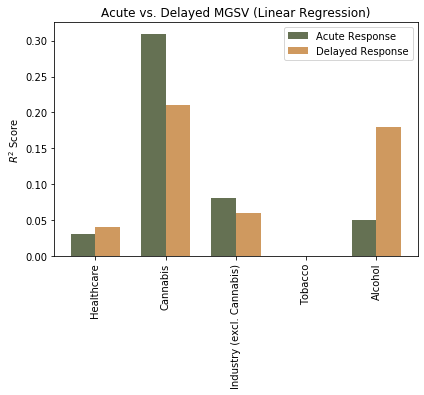

In [80]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, linear_acute_corr, width, color='#657153', label='Acute Response')
rects2 = ax.bar(x + width/2, linear_delay_corr, width, color='#CF995F', label='Delayed Response')

ax.set_ylabel('$R^{2}$ Score')
ax.set_title('Acute vs. Delayed MGSV (Linear Regression)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


fig.tight_layout()
plt.xticks(rotation=90)
print(f'Linear regression scores of the acute response (naMDI) and delayed response (taMDI) against the economic indicators.')
plt.savefig('./line_chart.png', bbox_inches="tight")

#### Dataframe comparing polynomial $R^{2}$ values

In [81]:
d3 = {'${R^2}$ (Polynomial)':["Acute", "Delayed"],
      'Healthcare':[poly_r_non_health,poly_r_adj_health],
      'Cannabis':[poly_r_non_cann, poly_r_adj_cann],
      'Industry (excl. Cannabis)':[poly_r_non_ind, poly_r_adj_ind],
      'Cigarettes':[poly_r_non_cig, poly_r_adj_cig],
      'Alcohol':[poly_r_non_alcohol, poly_r_adj_alcohol]
     }
df3 = pd.DataFrame(data=d3)
df3

,${R^2}$ (Polynomial),Healthcare,Cannabis,Industry (excl. Cannabis),Cigarettes,Alcohol
0,Acute,0.04,0.32,0.08,0.15,0.10
1,Delayed,0.05,0.22,0.08,0.00,0.22


##### Plotting grouped barchart for polynomial $R^{2}$ values

Polynomial regression scores of the acute response (naMDI) and delayed response (taMDI) against the economic indicators.


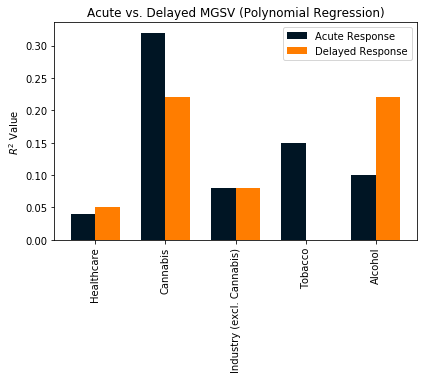

In [82]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(6.5, 4.0))
rects3 = ax.bar(x - width/2, poly_acute_corr, width, color='#001524', label='Acute Response')
rects4 = ax.bar(x + width/2, poly_delayed_corr, width, color='#FF7D00', label='Delayed Response')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('$R^{2}$ Value')
ax.set_title('Acute vs. Delayed MGSV (Polynomial Regression)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


plt.xticks(rotation=90)
print(f'Polynomial regression scores of the acute response (naMDI) and delayed response (taMDI) against the economic indicators.')
plt.savefig('./poly_chart.png', bbox_inches="tight")

Although there were significant interrelationships shown with linear regression the polynomial regression proved better fit and was the model used to analyze interrelationships as a result.

# Results

## Modeling

#### Estimated number of individuals experiencing mental distress:
taMDI and naMDI modeling provided a fairly narrow range of predictions:

- Between 7,790,068.3 and 8,066,567.2 Canadians dealt with a mental health episode in 2018.<br>
<br>
- Confirms 8,581,600.0 (our baseline) who dealt with a mental health episode in 2019.<br>
<br>
- Between 9,789,138.0 and 9,821,683.3 Canadians dealt with a mental health episode in 2020, an increase of between 1,207,537.95 (14.07%) and 1,240,083.35 (14.45%) over 2019 estimates.<br>
<br>
- Between 726,300.3 and 844,543.2 Canadians dealing with a mental health episode in January 2021.<br>


![dist_chart](dist_chart.png)

![dist_df](distress_df.png)<br>

### Time-adjusted Mental Distress Index (aMDI)<br>
![taMDI](aMDI.png)<br>

#### Time-adjusted Mental Distress Index:
Prediction model integrating the concept of time lag introducd by Lee (2020) which showed increased correlation to death by suicide.<br>

### Non-adjusted Mental Distress Index (naMDI)<br>
![naMDI](naMDI.png)<br>

#### Non-adjusted Mental Distress Index:
More volitile and does not account for time lag although allows for near-real-time data integration, Google Trends datasets included in this study were inclusive of Jan 11th 2021.<br>

## Economic Indicators

### Healthcare and Social Assistance<br>
![health](health.png)<br>
<br>

#### Healthcare and Social Assistance:
sector encompasses services involved in diagnosis and treatment, providing residential care for medical and social assistance including counselling, welfare, child protection, community housing and food services, vocational rehabilitation and child care, to those requiring assistance.

### Industry (excl. Cannabis)<br>
![industry](ind.png)<br>
<br>

#### Industry Specific GDP; Industry (excl. Cannabis):
The economy was massively affected by spring lockdowns and varying restrictions through the year due to the ongoing pandemic. Employment stressors would be one factor that explain the identified correlation but further study is needed before any conclusions can be made. 

### Cigarettes and Tobacco<br>
![cigarettes](cig.png)<br>
<br>
<br>

#### Tobacco: 
The carcinogenic properties of cigarettes and tobacco are well known. Other health implications include cardiorespiratory seasonal changes in cigarettes seem to indicate that weather may play a factor, with notable dips in the winter months. Highs in May and Sept suggest that long weekens or holidays may significantly contribute to tobacco sales.

### Alcohol<br>
![alcohol](alcohol.png)<br>
<br>

#### Alcohol: 
The depressive properties of alcohol are of especial interest in the mental health field. Inhibition and impulse control are correlated to increased  risk of high risk behaviour including gambling, alcohol, drug use and suicide.<br>

### Industry Specific GDP; Cannabis<br>
![cannabis](cann.png)<br>
<br>

#### Cannabis: 
Commonly used to self-medicate for anxiety and depression, research is still in its early phases but the psycho-active properties increase the risk of psychosis and other mental disorders with increased risk to those under 25 years of age.

*It should be noted when looking at Cannabis GDP that the industry was only legalized recreationally in October 2018.

# Analysis

## Implications of acute and chronic stress 

The patterns and differences between acute and delayed (chronic) stress are also interesting to note. The spending patterns can be viewed as "stress profiles", representing a modifier to an individuals likelihood of partaking in a particular activity.<br>

![poly_chart](poly_chart.png)<br>
<br>

There does appear to be a low to moderate correlation between the proposed mental distress indicies and different economic indicators, although more research is required to explore the possible interrelationships. The statistically significant polynomial $R^{2}$ values across multiple attributes suggests that social stress as measured by MGSV does have a positive correlation with spending in industries related to self-medication, with weaker interrelationships with healthcare and general industry.<br>

The two proposed models carry different estimates, with naMD estimating January 2021 -2.34% more stressful than January 2019 while taMDI modeling projects it is +8.37% more stressful based on prior months. To predict a *true* current estimate of stress being experienced by the public, a more detailed model encompasing both the acute and delayed models together should be established.<br>

It is interesting to note different the emerging trends when comparing the acute and delayed interrelationships:

- The correlation to chronic stress on alcohol ($R^{2}$ = .22), healthcare ($R^{2}$ = .05) are greater then that of acute stress ($R^{2}$ = .10 and .04 accordingly).
- Acute stress is strongly related to cannabis ($R^{2}$ = .32) and tobacco sales ($R^{2}$ = .15). It should be noted delayed stress showed $R^{2}$ = 0  with tobacco while cannabis still had a significant relationship months after MGSV data ($R^{2}$ = .22).
- Industry (excluding Cannabis) functions as a baseline, allowing us to compare the attributes against an aggregated industrial average sales index. The polynomial regression model weakly correlates both acute and delayed stress as having an equal ($R^{2}$ = .08) interrelationship with industry (excl. cannabis). 

These models suggest Canadians are generally experiencing mildly less acute stress than our 2019 baseline but greater chronic stress from previous months. Extrapolating that information against the plotted polynomial $R^{2}$ interrelationships and we may be able to gather some insight into the behavioural trends that may be expected going forward.<br>

## Limitations

It is unknown what percentage of respondents to the *Mental health characteristics and suicidal thoughts* (Stats Canada, 2019) were:

- Seeking mental healthcare assistance but not reporting suicidal ideation
- Reported suicidal ideation but were not seeking mental healthcare assistance
- Both confirmed they were experiencing suicidal ideation and currently under care of mental healthcare professional or social worker

Clarification regarding the *Mental health characteristics and suicidal thoughts (2019)* study may lower the absolute numbers by up to 43%, but the year over year modeling leaves the aggregate coefficients unchanged.<br>
<br>
It should also be noted that Google Trends is a proprietary product of Alphabet Inc. and as a result it is impossible to see the underlying raw data or methods. Due to the anonymous sampling of Google Trends data there may be natural variation when repeated which should be evaluated further to improve forecasting predictions. Google Trends gave varying MGSV results when search terms were repeated despite consistent parameters. It is assumed that these results are normally distributed but machine learning could be used to create a more accurate model to account for distributions.

# Conclusion

A strategic multi-faceted plan is urgently needed to prevent collapse of the healthcare system and support a stable economic recovery. In order for this to be done effectively we need up-to-date and relevant socioeconomic data in order to make informed decisions. Identifying models to assess social stress and predict behavioural trends could provide insights and data for economics, healthcare, and public policy. Preliminary research supports the validity of Google Trends as a tool in measuring socioeconomic and healthcare patterns. Further research is needed to clarify and improve these forecasting models as well as exploring the impact demographics may impact the data.<br> 

##### References:

- https://blog.google/products/search/a-new-window-into-our-world-with-real/
- https://support.google.com/trends/answer/4365533?hl=en
- Mental health characteristics and suicidal thoughts (Stats Canada, 2019)
- Gross domestic product by industry, Sept 2020 (Stats Canada, 2020)
- Tobacco, sales and inventories, monthly production (x1000) (Stats Canada, 2020)
- Monthly retail sales of beer, wine and liquor stores in Canada from 2015 to 2020 (in billion Canadian dollars)(Statista, 2020)
- Worldwide desktop market share of leading search engines from January 2010 to October 2020 (Statista, 2020)
- Lee, J., (2020) Search trends preceding increases in suicide: A cross-correlation study of
monthly Google search volume and suicide rate using transfer function models
- Parker, et al. (2017). Forecasting state-level premature deaths from alcohol, drugs, and suicides
using Google Trends data
- Sapolsky, Robert M. (2004). Why zebras don't get ulcers. New York: Owl Book/Henry Holt and Co.